In [1]:
%matplotlib inline
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

In [2]:
lena = misc.imread('images/LENA_512.jpg')
gazeta = misc.imread('images/gazeta.jpg')


In [3]:
def greyscale(picture):
    grey_picture = np.copy(picture)
    for row in grey_picture:
        for col in row:
            col[0] = col[1] = col[2] = (int(col[0]) + int(col[1]) + int(col[2]))/3
    return grey_picture

In [14]:
def RGBtoYCbCr(picture):
    YCbCrpicture = np.copy(picture)
    for x, row in enumerate(YCbCrpicture):
        for y, col in enumerate(row):
            YCbCrpicture[x][y][0] = 0.299 * picture[x][y][0] + 0.587 * picture[x][y][1] + 0.114 * picture[x][y][2]
            YCbCrpicture[x][y][1] = 128 - 0.168736 * picture[x][y][0] - 0.331264 * picture[x][y][1] + 0.5 * picture[x][y][2]
            YCbCrpicture[x][y][2] = 128 + 0.5 * picture[x][y][0] - 0.418688 * picture[x][y][1] - 0.081312 * picture[x][y][2]
    return YCbCrpicture

In [32]:
def YCbCrtoRGB(picture):
    RGBpicture = np.copy(picture)
    for x, row in enumerate(RGBpicture):
        for y, col in enumerate(row):
            RGBpicture[x][y][0] = picture[x][y][0] + 1.402 * (picture[x][y][2] - 128) 
            RGBpicture[x][y][1] = picture[x][y][0] - 0.34414 * (picture[x][y][1] - 128) - 0.71414 * (picture[x][y][2] - 128)
            RGBpicture[x][y][2] = picture[x][y][0] + 1.772   * (picture[x][y][1] - 128)
    return RGBpicture

In [50]:
def binA (picture, a):
    newpicture = np.copy(RGBtoYCbCr(greyscale(picture)))
    for row in newpicture:
        for col in row:
            if (col[0] <= a):
                col[0] = 0
            if (col[0] > a):
                col[0] = 255
    return YCbCrtoRGB(newpicture)

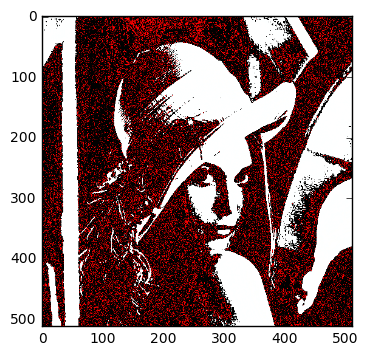

In [51]:
s1 = binA(lena,150)
plt.imshow(s1)
plt.show()

In [41]:
def binAB (picture, a, b):
    newpicture = np.copy(RGBtoYCbCr(greyscale(picture)))
    for row in newpicture:
        for col in row:
            if (col[0] < a):
                col[0] = 0
            elif (col[0] <= b):
                col[0] = 255
            else:
                col[0] = 0
    return YCbCrtoRGB(newpicture)

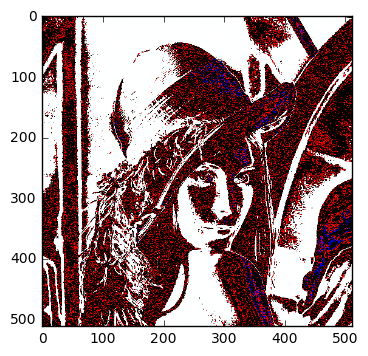

In [47]:
s1 = binAB(lena,100,150)
plt.imshow(s1)
plt.show()

In [55]:
def binBW (picture, a):
    newpicture = np.copy((greyscale(picture)))
    for row in newpicture:
        for col in row:
            if (col[0] <= a):
                col[0] = col[1] = col[2] = 0
            if (col[0] > a):
                col[0] = col[1] = col[2] = 255
    return (newpicture)

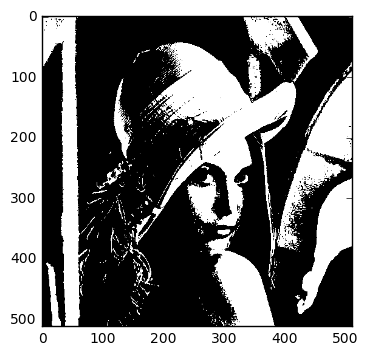

In [57]:
s1 = binBW(lena,150)
plt.imshow(s1)
plt.show()

In [58]:
def bin2BW (picture, a, b):
    newpicture = np.copy((greyscale(picture)))
    for row in newpicture:
        for col in row:
            if (col[0] <= a):
                col[0] = col[1] = col[2] = 0
            elif (col[0] < b):
                col[0] = col[1] = col[2] = 255
            else:
                col[0] = col[1] = col[2] = 0
    return (newpicture)

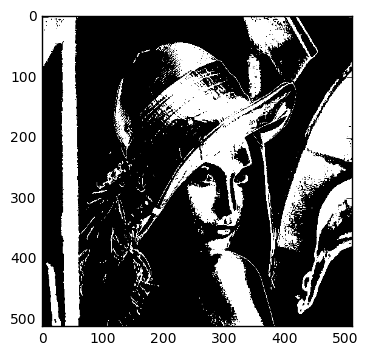

In [60]:
s1 = bin2BW(lena,150, 200)
plt.imshow(s1)
plt.show()